# Survivor Social Networks
## Borneo

In [2]:
import graphlab as gl
import networkx as nx
import matplotlib.pyplot as plt
import csv
%matplotlib inline

## GraphLab overview

In [3]:
gvotes = gl.SFrame.read_csv("borneoList.csv", column_type_hints={'s1':str, 's2':str, 'samevotes':float})

PROGRESS: Finished parsing file /Users/bc/Github/Survivor-Project/borneoList.csv
PROGRESS: Parsing completed. Parsed 43 lines in 0.040325 secs.
PROGRESS: Finished parsing file /Users/bc/Github/Survivor-Project/borneoList.csv
PROGRESS: Parsing completed. Parsed 43 lines in 0.019137 secs.


In [4]:
g = gl.SGraph()
g = g.add_edges(gvotes, 's1', 's2')

In [5]:
gl.canvas.set_target('ipynb')
g.show(vlabel='id')

## NetworkX graph stats and centrality measures

In [6]:
G=nx.Graph()

file = open('borneoList.csv')
reader = csv.reader(file)
next(reader, None)
for row in reader:
    G.add_edge(row[0], row[1], weight=int(row[2]))
#     print row[2]

# G.edges(data=True)

In [7]:
len(G)

16

In [8]:
nx.number_of_edges(G)

43

In [9]:
nx.diameter(G)

4

In [10]:
nx.radius(G)

2

In [11]:
# Sorting function from SNAS pg. 47
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

deg = nx.degree(G)
deg = {k:round(v,1) for k, v in deg.items()}
deg_sort = sorted_map(deg)
# deg_sort

In [12]:
close = nx.closeness_centrality(G)
close = {k:round(v,3) for k, v in close.items()}
close_sort = sorted_map(close)
# close_sort

In [13]:
btw = nx.betweenness_centrality(G)
btw = {k:round(v,3) for k, v in btw.items()}
btw_sort = sorted_map(btw)
# btw_sort

In [14]:
eig = nx.eigenvector_centrality(G)
eig = {k:round(v,3) for k, v in eig.items()}
eig_sort = sorted_map(eig)
# eig_sort

In [15]:
# Reference: SNAS pg. 54
names1=[x[0] for x in deg_sort]
names2=[x[0] for x in close_sort]
names3=[x[0] for x in btw_sort]
names4=[x[0] for x in eig_sort]

# use Python sets to compute a union of the sets 
names=list(set(names1) | set(names2) | set (names3) | set (names4))

## Build a table with centralities 
table=[[name,deg[name],close[name],btw[name],eig[name]] for name in names]

import pandas as pd
headers = ['Name', 'Degrees', 'Closeness', 'Betweenness', 'Eigenvector']
df = pd.DataFrame(table, columns=headers)
df = df.sort(['Eigenvector', 'Degrees'], ascending=[0, 0])
df

,Name,Degrees,Closeness,Betweenness,Eigenvector
14,Rudy,6,0.600,0.026,0.507
2,Susan,6,0.600,0.026,0.493
1,Richard,6,0.600,0.026,0.469
11,Sean,6,0.600,0.026,0.359
6,Kelly,8,0.652,0.271,0.354
4,Dirk,4,0.417,0.000,0.122
15,Jenna,11,0.789,0.405,0.093
13,Colleen,7,0.625,0.095,0.034
7,Stacey,2,0.417,0.000,0.028
12,Gretchen,6,0.556,0.010,0.017


## Weighted graph

In [16]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= 5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < 5]

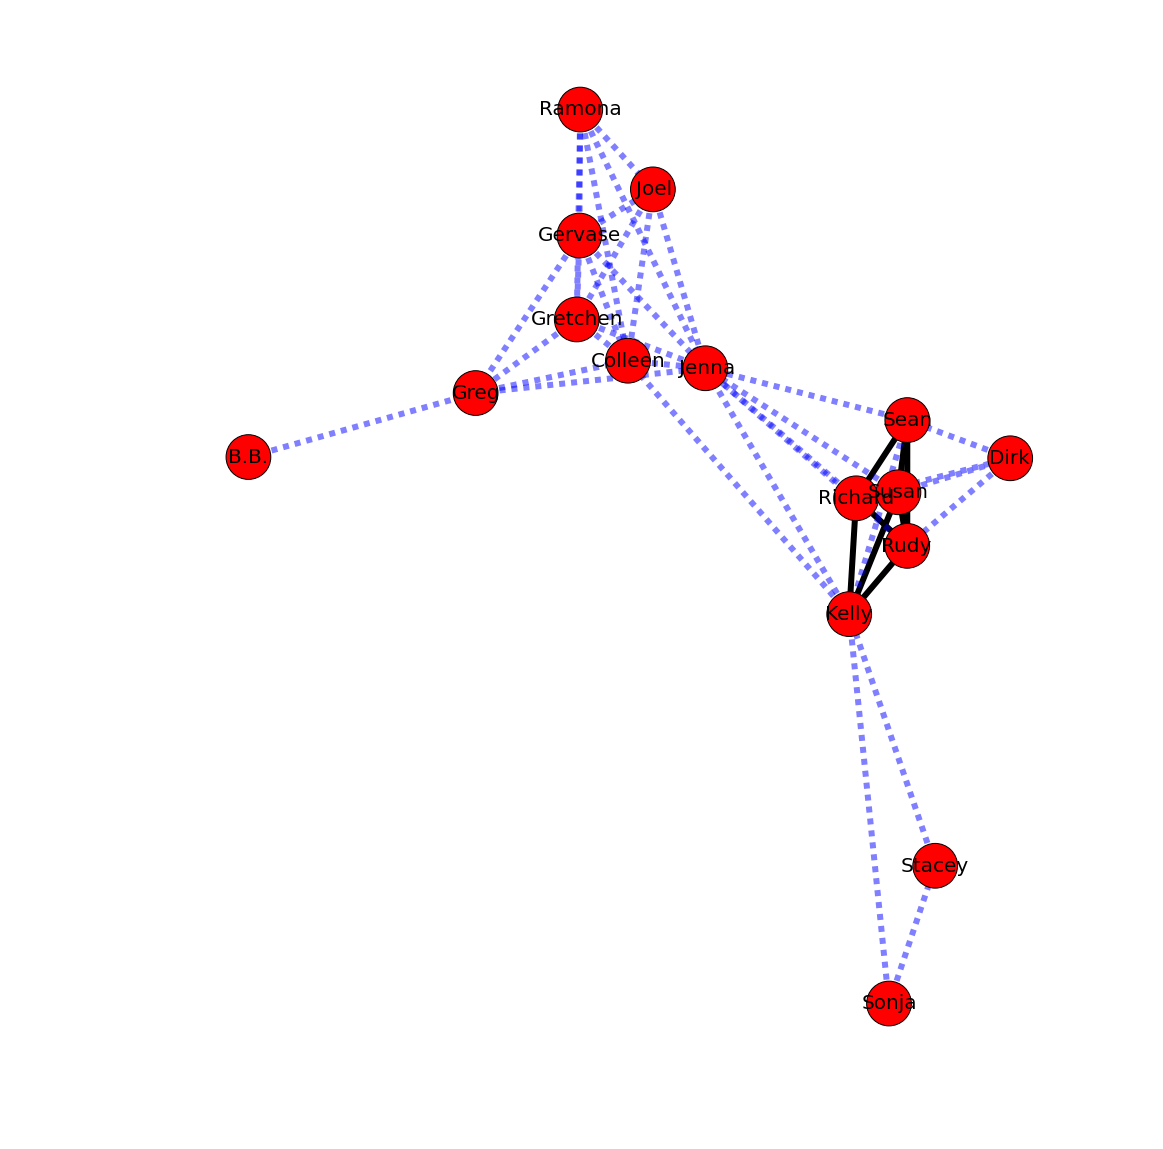

In [17]:
plt.figure(figsize=(20,20))
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=2000)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display